In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

data = fetch_ucirepo(id=17)
X = data.data.features
y = data.data.targets.iloc[:, 0].map({'M': 1, 'B': 0})

print("INFORMASI DATASET BREAST CANCER WISCONSIN (DIAGNOSTIC)\n")

# Jumlah data dan fitur
print(f"Jumlah sample (baris): {X.shape[0]}")
print(f"Jumlah fitur (kolom): {X.shape[1]}\n")

# Daftar nama fitur
print("Daftar Nama Fitur")
for i, col in enumerate(X.columns, start=1):
    print(f"{i}. {col}")
print("\nTotal fitur:", len(X.columns), "\n")

# Tampilkan beberapa baris pertama
print("Contoh data fitur:")
display(X.head())

# Informasi target (label)
print("\nInformasi Target")
print("Mapping label:")
print("0 = Benign (tidak berbahaya)")
print("1 = Malignant (ganas)\n")

print("Jumlah masing-masing kelas:")
print(y.value_counts())

print("\nPersentase kelas:")
print((y.value_counts(normalize=True) * 100).round(2))

INFORMASI DATASET BREAST CANCER WISCONSIN (DIAGNOSTIC)

Jumlah sample (baris): 569
Jumlah fitur (kolom): 30

Daftar Nama Fitur
1. radius1
2. texture1
3. perimeter1
4. area1
5. smoothness1
6. compactness1
7. concavity1
8. concave_points1
9. symmetry1
10. fractal_dimension1
11. radius2
12. texture2
13. perimeter2
14. area2
15. smoothness2
16. compactness2
17. concavity2
18. concave_points2
19. symmetry2
20. fractal_dimension2
21. radius3
22. texture3
23. perimeter3
24. area3
25. smoothness3
26. compactness3
27. concavity3
28. concave_points3
29. symmetry3
30. fractal_dimension3

Total fitur: 30 

Contoh data fitur:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Informasi Target
Mapping label:
0 = Benign (tidak berbahaya)
1 = Malignant (ganas)

Jumlah masing-masing kelas:
Diagnosis
0    357
1    212
Name: count, dtype: int64

Persentase kelas:
Diagnosis
0    62.74
1    37.26
Name: proportion, dtype: float64


In [ ]:
# SPLIT DATA: TRAIN (70%), VAL (15%), TEST (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


# PIPELINE UNTUK SCALER + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])


# GRID SEARCH UNTUK HYPERPARAMETER TUNING
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 0.1, 0.01, 0.001]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# EVALUASI PADA TRAIN SET
print("\nTRAIN RESULT")
y_train_pred = best_model.predict(X_train)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2%}")
print(classification_report(y_train, y_train_pred))

# EVALUASI PADA VALIDATION SET
print("\nVALIDATION RESULT")
y_val_pred = best_model.predict(X_val)

print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2%}")
print(classification_report(y_val, y_val_pred))

# FINAL EVALUATION PADA TEST SET
print("\nTEST RESULT")
y_test_pred = best_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2%}")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale'}

TRAIN RESULT
Train Accuracy: 98.99%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       1.00      0.97      0.99       148

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


VALIDATION RESULT
Validation Accuracy: 97.65%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.94      0.97        32

    accuracy                           0.98        85
   macro avg       0.98      0.97      0.97        85
weighted avg       0.98      0.98      0.98        85


TEST RESULT
Test Accuracy: 96.51%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
 

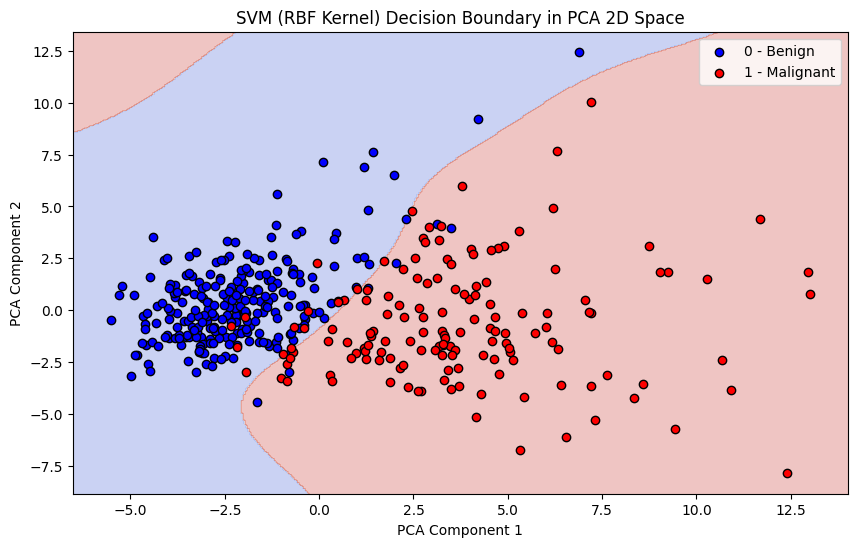

In [ ]:
# VISUALISASI NONLINEAR DECISION BOUNDARY DENGAN PCA 2D

# Ambil scaler dari model terbaik
scaler = best_model.named_steps['scaler']

# Transform data ke bentuk scaled
X_train_scaled = scaler.transform(X_train)

# PCA ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Ambil parameter terbaik untuk model visualisasi
best_C = grid.best_params_['svm__C']
best_gamma = grid.best_params_['svm__gamma']

# Train ulang model pada ruang PCA (khusus visualisasi)
model_vis = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
model_vis.fit(X_train_pca, y_train)

# Membuat grid untuk decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot dengan label berbeda
plt.scatter(
    X_train_pca[y_train == 0, 0],
    X_train_pca[y_train == 0, 1],
    c='blue', label='0 - Benign', edgecolors='k'
)

plt.scatter(
    X_train_pca[y_train == 1, 0],
    X_train_pca[y_train == 1, 1],
    c='red', label='1 - Malignant', edgecolors='k'
)

plt.title("SVM (RBF Kernel) Decision Boundary in PCA 2D Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
